Burgers Equation

Consider 1D Burger's Equation

$$\frac{\partial u }{\partial t} = -u \frac{\partial u}{\partial x}$$

Represent in conservative form:

$$\frac{\partial u }{\partial t} = - \frac{\partial}{\partial x} \left( \frac{u^2}{2} \right)$$

We can also write this as:

$$\frac{\partial u }{\partial t} = - \frac{\partial F}{\partial x}$$

if we take $F = \frac{u^2}{2}$

Inital Conditions

 \begin{equation}u(x,0) = \left\{ \begin{array}{cc}
1  & 0 \leq x < 3  \\
0 & 2 \leq x \leq 4 \\ \end{array} \right.\end{equation}

In [69]:
%matplotlib inline
import numpy
from matplotlib import pyplot

In [70]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [71]:
def u_initial(nx):
    u = numpy.zeros(nx)
    u[:(nx-1)*2./4.] = 1
    return u

In [72]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

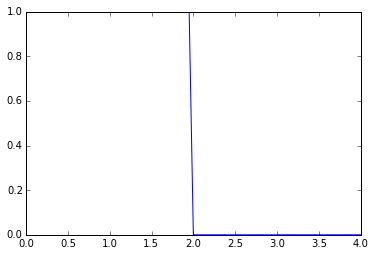

In [74]:
Array = numpy.linspace(0,4, nx)
pyplot.plot(Array, u_initial(nx))

In [38]:
computeF = lambda u: (u/2)**2

What does computeF do?

MacCormack scheme:

$$u_i^* = u_i^n - \frac{\Delta t}{\Delta x} (F_{i+1}^n - F_i^n)  \ \ (predictor) $$


$$u_i^{n+1} = \frac{1}{2} \left( u_i^n + u_i^* \frac{\Delta t}{\Delta x} (F_{i}^* - F_{i-1}^*) \right) \ \ (corrector) $$

In [130]:
def maccormack(u,nt,dt,dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    epsilon = 0.6
    for i in range(1,nt):
        F = computeF(u)
        
        ustar[1:-1] = u[1:-1] - dt/dx *(F[2:] - F[:-2]) + epsilon*(u[2:] - 2*u[1:-1] + u[:-2])
        
        Fstar = computeF(ustar)
        
        un[i,1:] = .5*(u[1:] + ustar[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        
        u = un[i].copy()
        
    return un

In [131]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


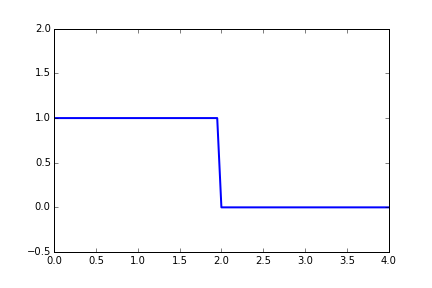
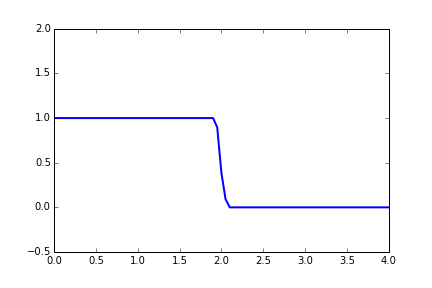
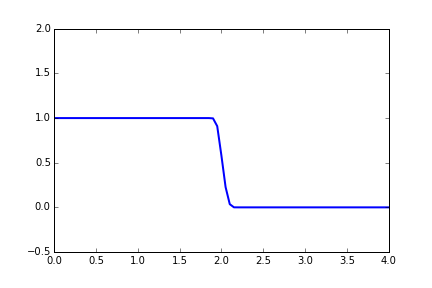
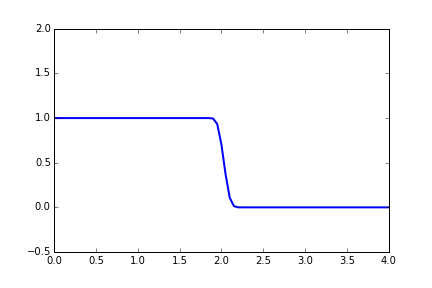
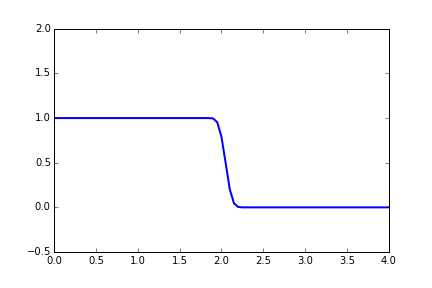
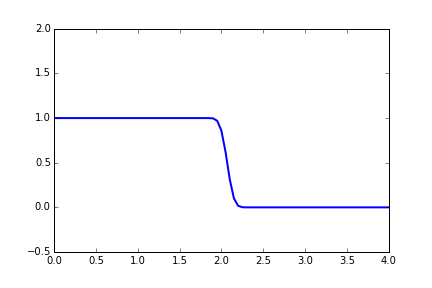
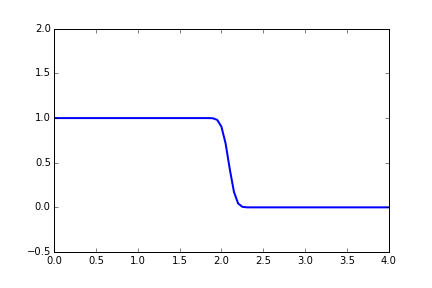
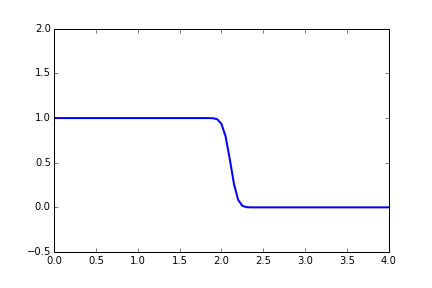
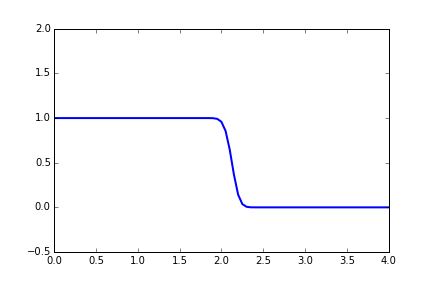
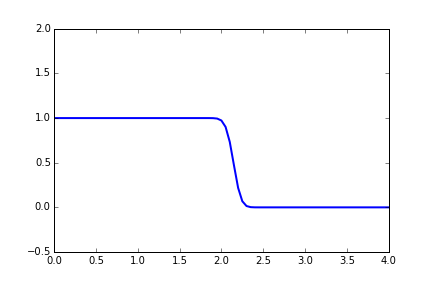
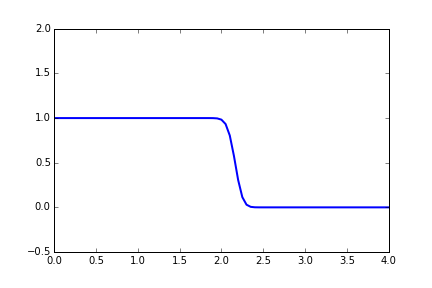
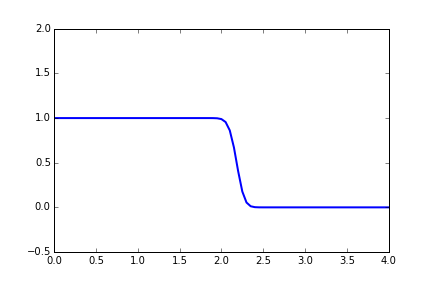
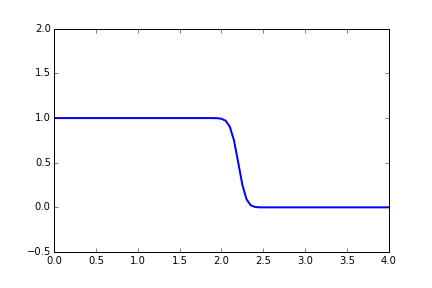
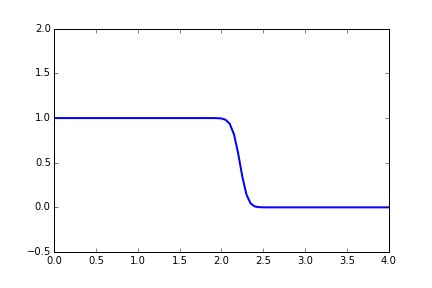
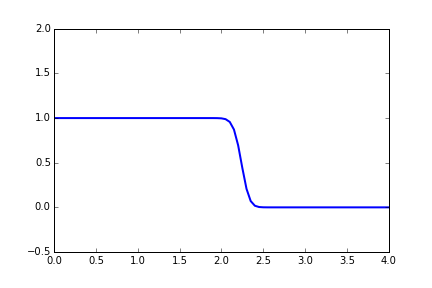
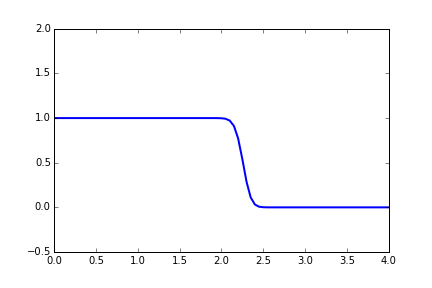
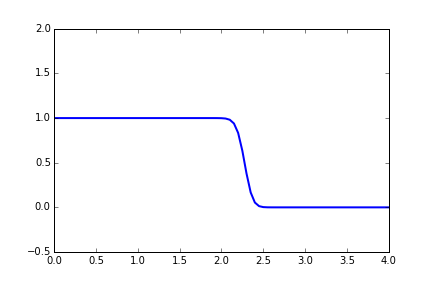
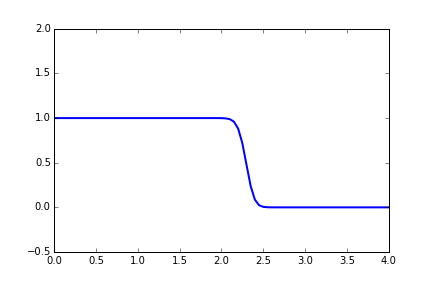
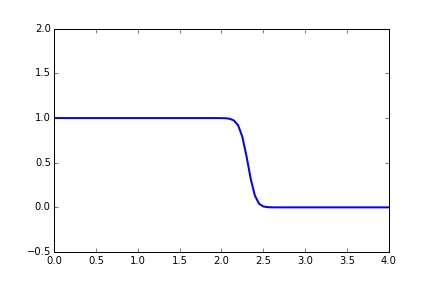
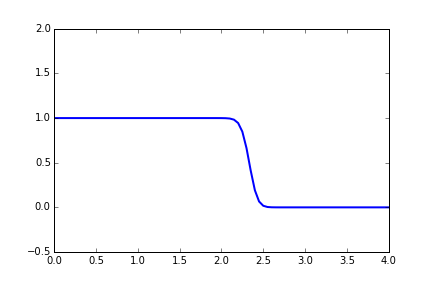
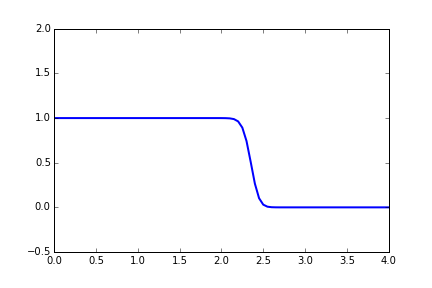
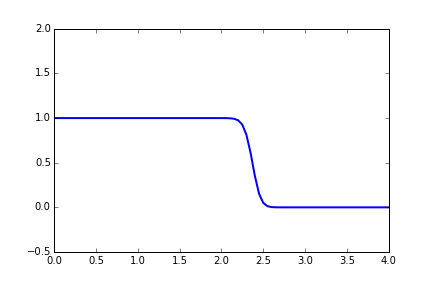
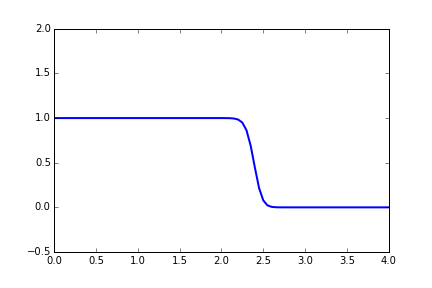
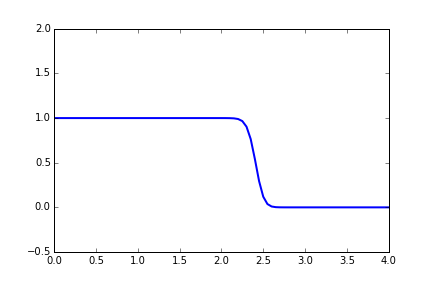
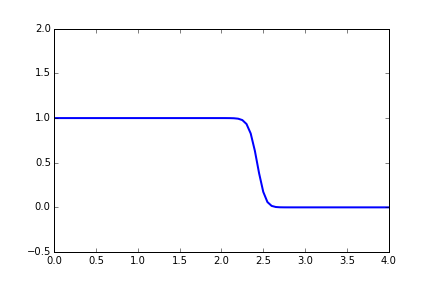
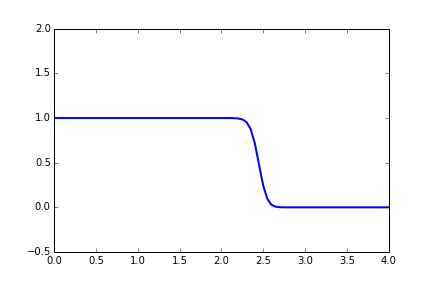
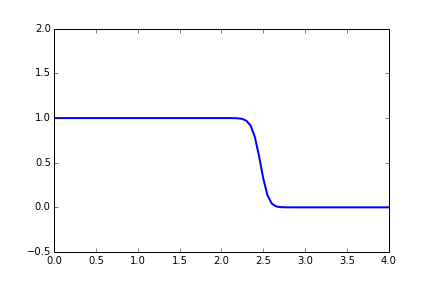
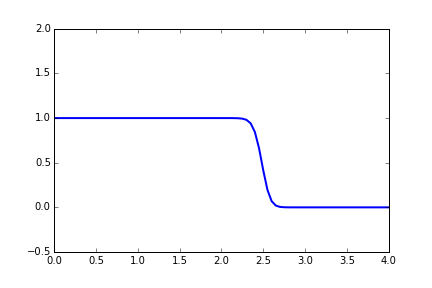
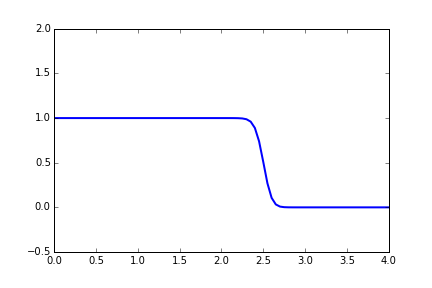
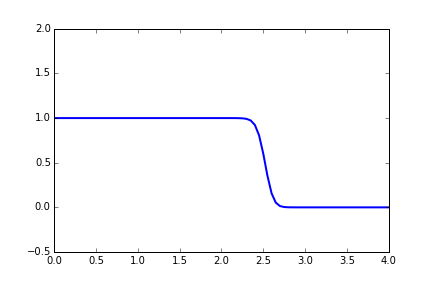
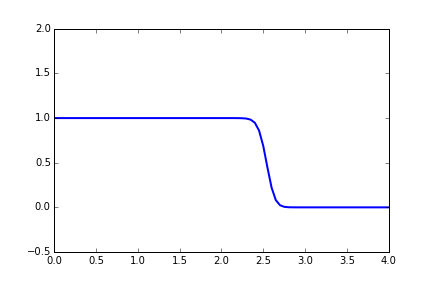
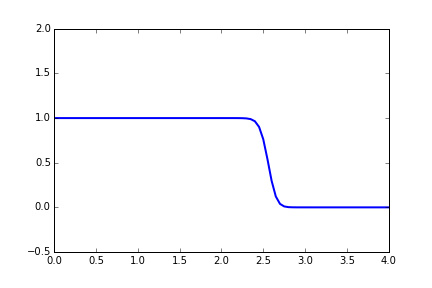
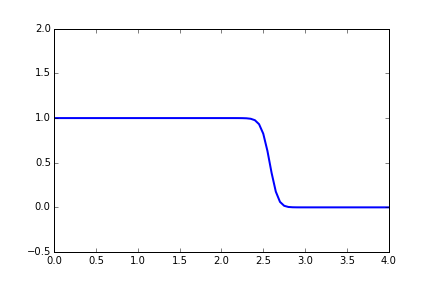
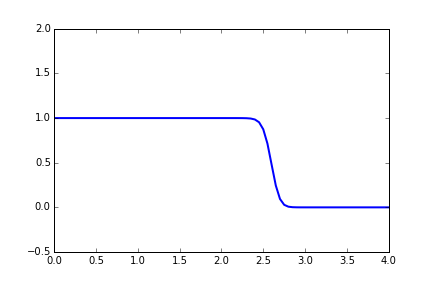
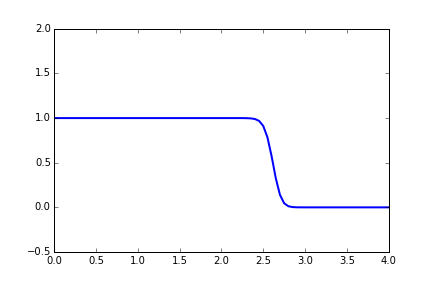
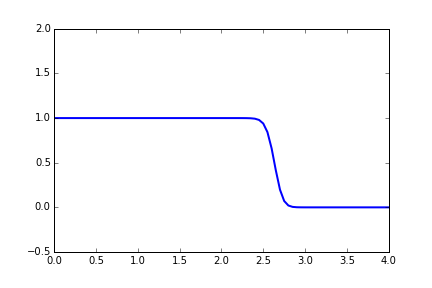
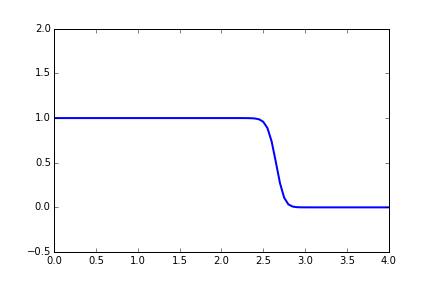
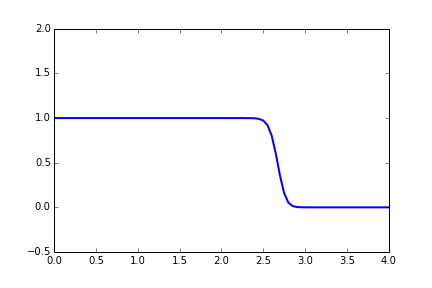
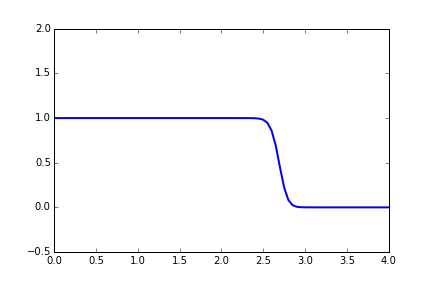
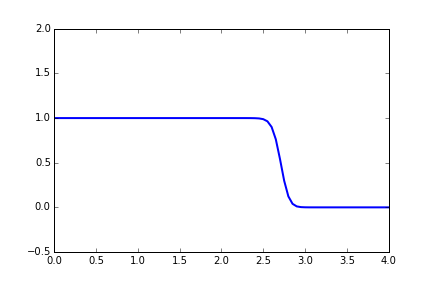
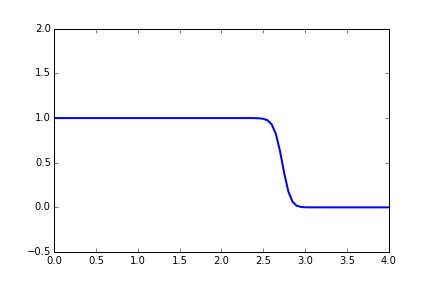
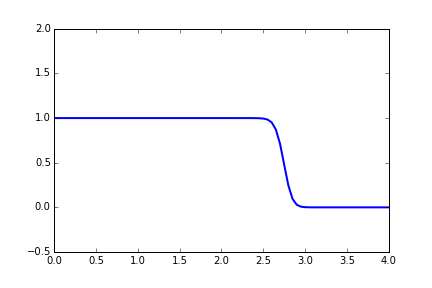
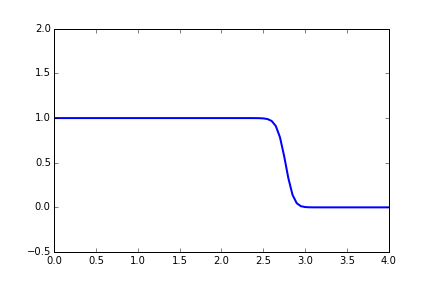
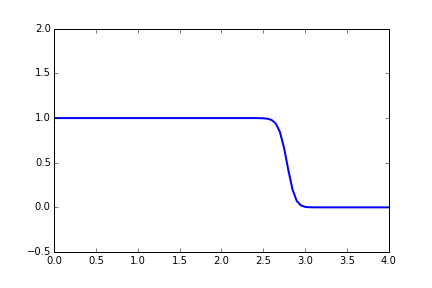
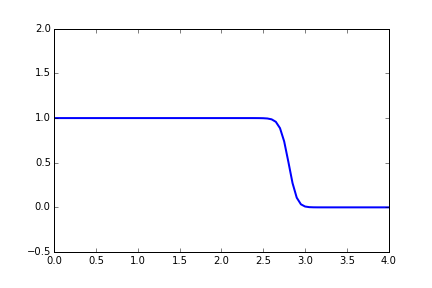
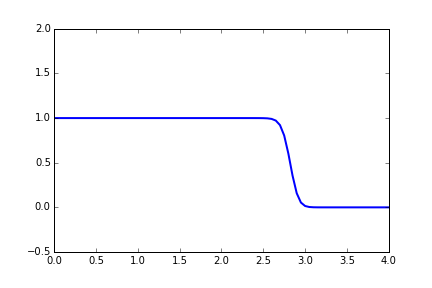
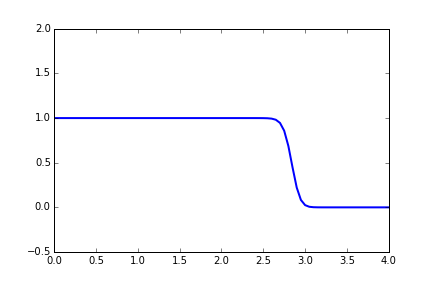
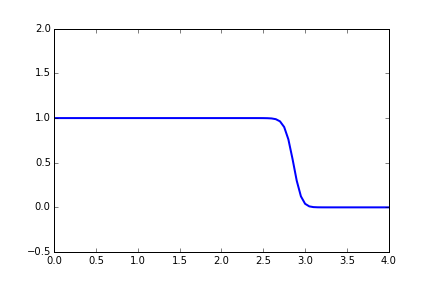
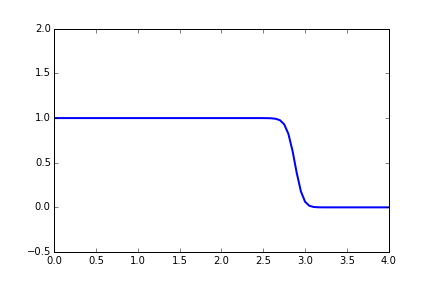
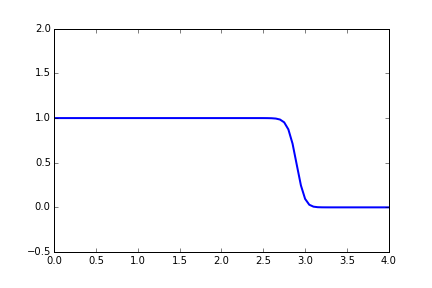
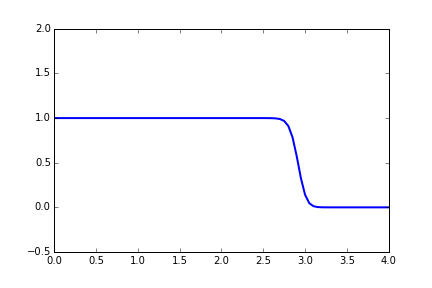
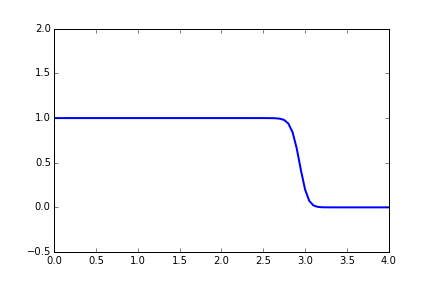
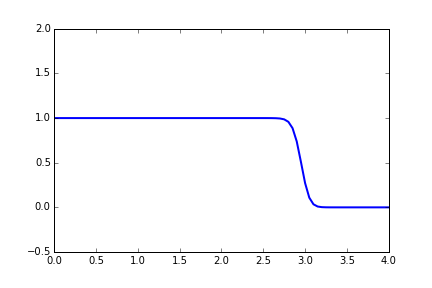
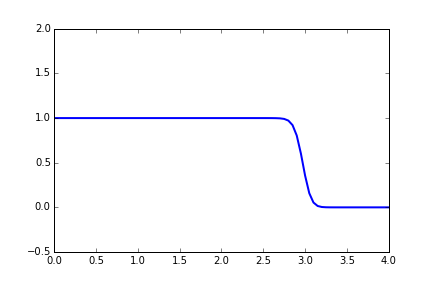
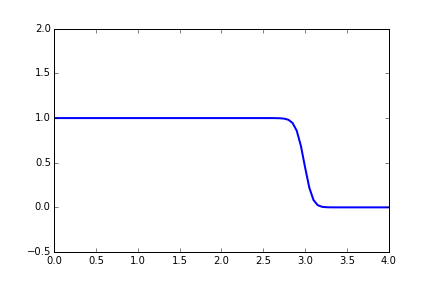
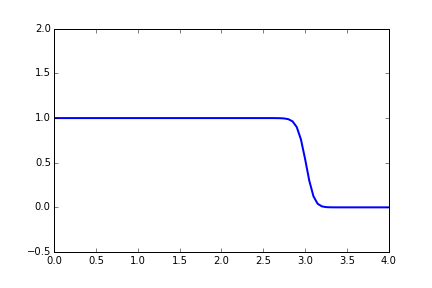
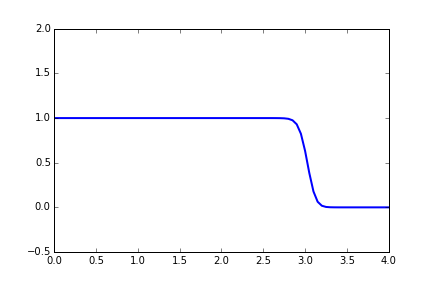
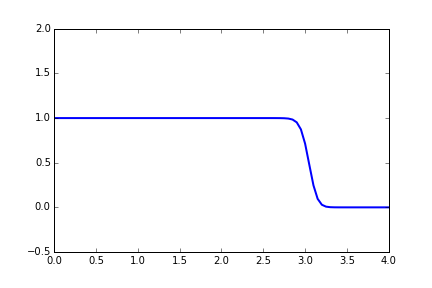
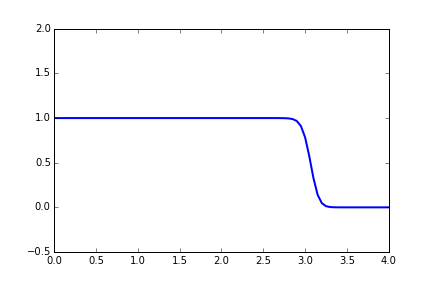
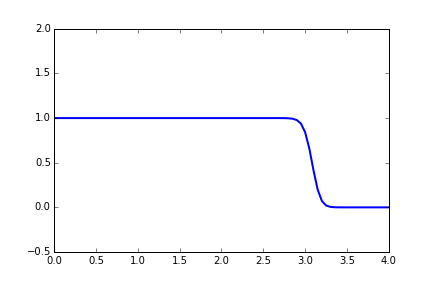
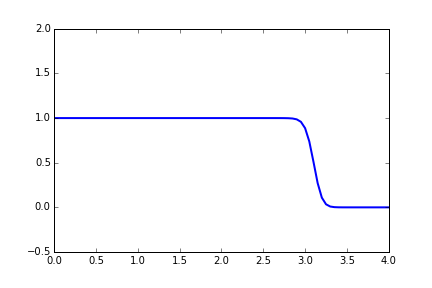
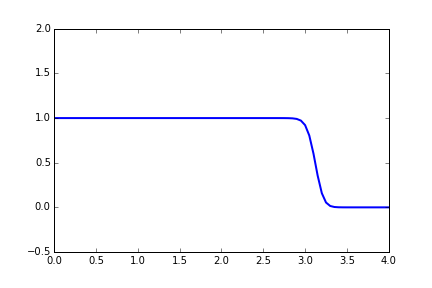
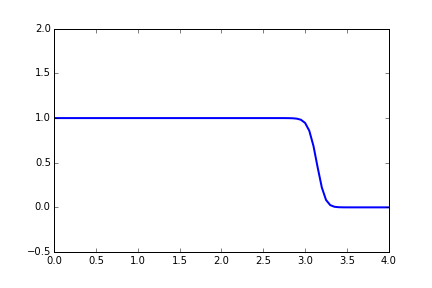
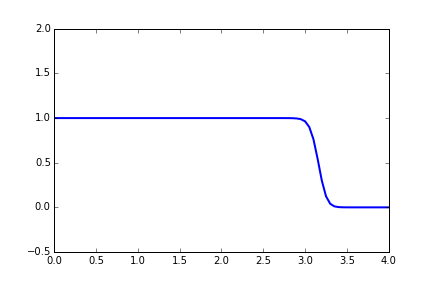
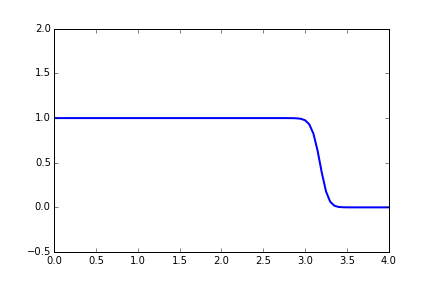
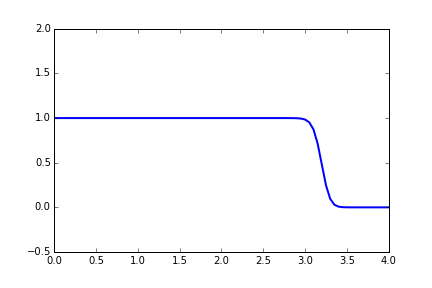
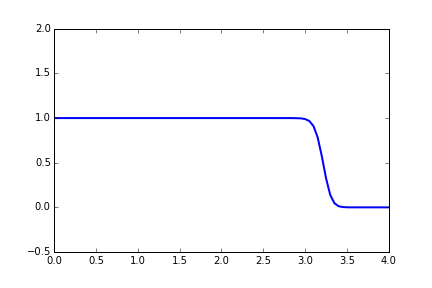
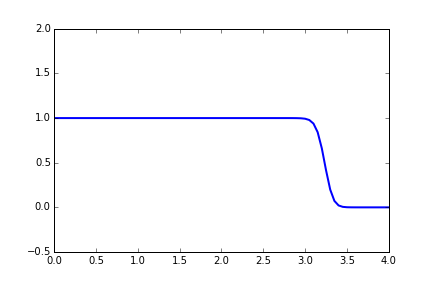
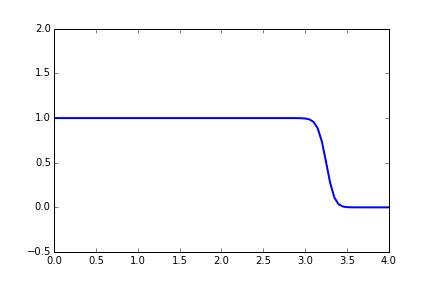
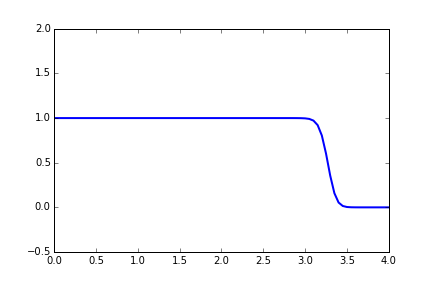

In [132]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx
un = maccormack(u,nt,dt,dx)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval = 50)
display_animation(anim, default_mode='once')

A common damping term used with Maccormack is:

$$\epsilon (u_{i+1}^n - 2u_i^n + u_{i-1}^n) $$

In [96]:
Array = numpy.linspace(1,10,10)
print(Array[:-2])

[ 1.  2.  3.  4.  5.  6.  7.  8.]
